## Install library
```shell
pip install pylibdmtx

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylibdmtx.pylibdmtx import decode

In [11]:
def read_matrix_code(img):
    _h, _w, _ = img.shape
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Decode using pylibdmtx
    decoded_objects = decode(gray)
    
    # Extract and print data
    for obj in decoded_objects:
        print("Data:", obj.data.decode('utf-8'))
        
        # Draw a rectangle around the barcode
        x, y, w, h = obj.rect
        x0 = x
        xt = x + w
        y0 = _h - y # Convert to top-left corner
        yt = _h - (y + h) # Convert to top-left corner

        cv2.rectangle(img, (x0, y0), (xt, yt), (0, 255, 0), 2)
    
    # Convert BGR to RGB for Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image using Matplotlib
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()
    return img

#### tidak terdeteksi, sepertinya karena matrixcode nya salah,

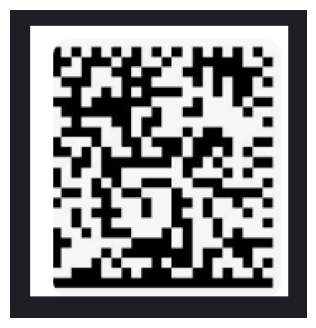

In [13]:
# Load image using OpenCV
img = cv2.imread('matrixcode.png', cv2.IMREAD_COLOR)

# Call the function
img_output = read_matrix_code(img) 

<br><br>
#### generated by https://barcode.tec-it.com/en/DataMatrix

Data: This is a Data Matrix by Yunus


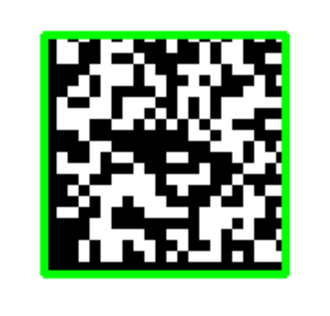

In [5]:
# Load image using OpenCV
img = cv2.imread('matrixcode_2.png', cv2.IMREAD_COLOR)

# Call the function
read_matrix_code(img) 

<br><br>
#### sample from https://github.com/NaturalHistoryMuseum/pylibdmtx/blob/master/pylibdmtx/tests/datamatrix.png

Data: Stegosaurus
Data: Plesiosaurus


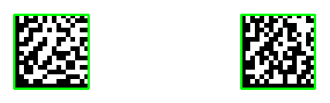

In [14]:
# Load image using OpenCV
img = cv2.imread('matrixcode_3.png', cv2.IMREAD_COLOR)

# Call the function
img_output = read_matrix_code(img) 

#### Apply Cropping before call function

Cropped Image by horizontal 20.0% - 50.0% and vertical 50.0% - 75.0%


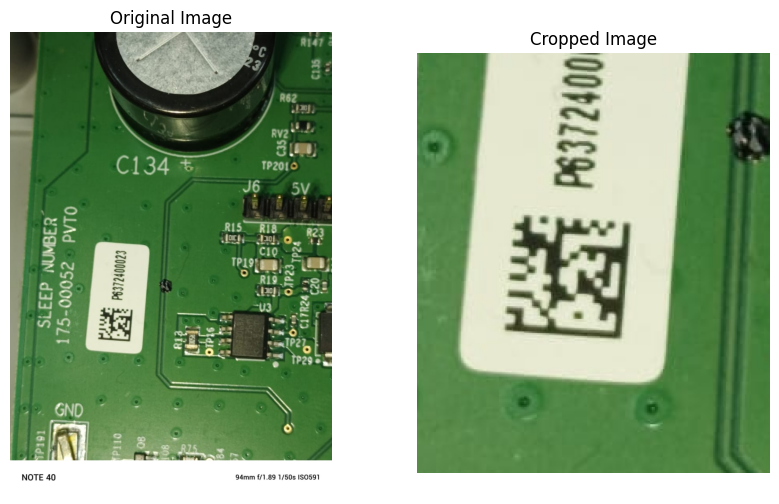

In [15]:
# Load the image
original_img = cv2.imread('matrixcode_4.png')  # Replace with your image file

# Get the image dimensions
h, w, __ = original_img.shape

# Crop the image

crop_x0 = 0.2 #`20% padding from left`
crop_xt = 0.5 #`20% padding from right`
crop_y0 = 0.50 #`20% padding from top`
crop_yt = 0.75 #`25% padding from bottom`

print(f"Cropped Image by horizontal {crop_x0*100}% - {crop_xt*100}% and vertical {crop_y0*100}% - {crop_yt*100}%")

img = original_img[int(h * crop_y0) : int(h * crop_yt), int(w * crop_x0) : int(w * crop_xt)]


# display the image
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.imshow(original_img[:,:,::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img[:,:,::-1])
plt.title("Cropped Image")
plt.axis("off")

plt.show()


Data: P6372400023


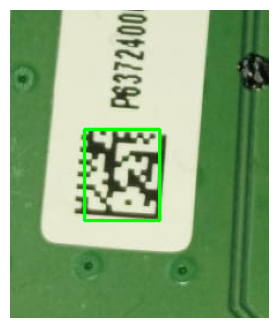

In [16]:
# Call the function
img_output = read_matrix_code(img) 

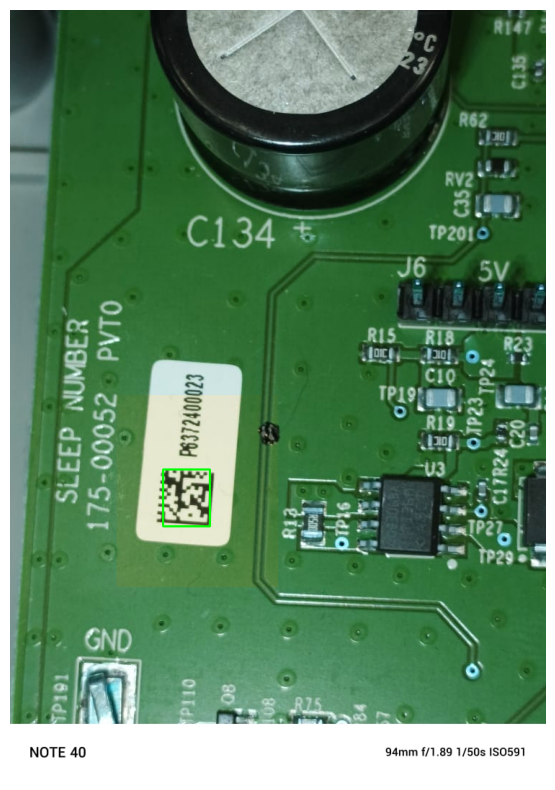

In [20]:

original_img_copy = original_img.copy()

original_img_copy[int(h * crop_y0) : int(h * crop_yt), int(w * crop_x0) : int(w * crop_xt)] = img_output

# Display the image using Matplotlib
plt.figure(figsize=(8, 10))
plt.imshow(original_img_copy)
plt.axis("off")  # Hide axes
plt.show()